# Capstone Project - The Battle of Restaurants in Hong Kong
### Applied Data Science Capstone by IBM/Coursera
#### Wong Man Yan

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

Hong Kong, which is an international city in the world, has a huge flow of people coming and leaving Hong Kong everyday. As a result, Hong Kong includes different countries of people and each place may have its own cultures. The diversity of culture forms different restaurants with different foods from different countries and cities. Not only Hong Kong local food, it also includes Chinese food, Korean food, Indian food while it also has western food. There are not only one or two restaurants for a specific type, for each kind of food, both have a certain amount of restaurants providing food for people. Different kinds of restaurants can provide different foods which suit everyone's culture and let them eat their country's food in Hong Kong. Also, it can let other people in Hong Kong try different types of food around the world.
Even though Hong Kong is an international city, it is only a small place, however, it contains a huge amount of restaurants with different foods. As a result, through this project, I would like to investigate the most popular restaurant in Hong Kong, and choose the best place for opening a restaurant in Hong Kong, with the following kind of food.


### Business Problem

Assuming we are investors, and we want to open a new restaurant in Hong Kong, however, the main point is that we should decide the location where we should open the restaurant and which type of food we should open.
 
To solve the above problem, the first thing is that we need to know the restaurant situation in Hong Kong. We need to know how many restaurants in Hong Kong and which district has the largest number of restaurants. 
Secondly, we would like to know how many types of food in Hong Kong with the most popular food type.
Thirdly, we need to know what is the most popular restaurant in Hong Kong and whether we should open the same type of food.
 
Through the above process, doing the steps step by step can help us know more about the restaurant situation in Hong Kong and decide where we should open the restaurant with the specific food.


### Problem Statement
1. How many restaurants in Hong Kong?
2. Which district has the largest number of restaurants?
3. How many types of food in Hong Kong?
4. What is the most popular food type?
5. What is the most popular restaurant in Hong Kong?
6. Where should we open the restaurant?
7. Which food should we provide?

## Data <a name="data"></a>

To investigate the restaurants in Hong Kong, some dataset must be required.
The following will be the data that will be used in the project.

#### 1. Hong Kong districts name with the following locations
* As Hong Kong has 18 districts, we need to obtain the districts name and the following location which are the latitude and longitude of these districts.

#### 2. Restaurants in Hong Kong with location, name, categories
* We need to obtain the restaurants location, name, id, categories, etc for analysing the result.

## Methodology <a name="methodology"></a>
1. For Hong Kong districts data, it will be collected through https://www.geodatos.net/en/coordinates/hong-kong which contains the districts name of Hong Kong with the corresponding coordinates

2. For information of restaurants in Hong Kong, these data will be collected through FourSquare api.

In [1]:
import pandas as pd
import numpy as np
import json
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns

In [171]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query=food'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    store.append(results)

### Get data of districts in Hong Kong

In [3]:
#Getting the geographical coordinates from csv files
df = pd.read_csv('HKDistricts.csv')
df

,District,Coordinates
0,Hong Kong,"22.27832, 114.17469"
1,Kowloon,"22.31667, 114.18333"
2,Tsuen Wan,"22.37137, 114.11329"
3,Yuen Long Kau Hui,"22.45, 114.03333"
4,Tung Chung,"22.28783, 113.94243"
5,Sha Tin,"22.38333, 114.18333"
6,Tuen Mun,"22.39175, 113.97157"
7,Tai Po,"22.45007, 114.16877"
8,Sai Kung,"22.38333, 114.26667"
9,Yung Shue Wan,"22.22623, 114.11241"


In [4]:
#Split the coordinates into latitude & longtitude
df[['Latitude','Longitude']] = df['Coordinates'].str.split(', ',expand=True)
df['Latitude'] = df['Latitude'].astype('float')
df['Longitude'] = df['Longitude'].astype('float')
df

,District,Coordinates,Latitude,Longitude
0,Hong Kong,"22.27832, 114.17469",22.27832,114.17469
1,Kowloon,"22.31667, 114.18333",22.31667,114.18333
2,Tsuen Wan,"22.37137, 114.11329",22.37137,114.11329
3,Yuen Long Kau Hui,"22.45, 114.03333",22.45000,114.03333
4,Tung Chung,"22.28783, 113.94243",22.28783,113.94243
5,Sha Tin,"22.38333, 114.18333",22.38333,114.18333
6,Tuen Mun,"22.39175, 113.97157",22.39175,113.97157
7,Tai Po,"22.45007, 114.16877",22.45007,114.16877
8,Sai Kung,"22.38333, 114.26667",22.38333,114.26667
9,Yung Shue Wan,"22.22623, 114.11241",22.22623,114.11241


### Get data of restaurants in Hong Kong

In [237]:
CLIENT_ID = '' #Hidden
CLIENT_SECRET = '' #Hidden
VERSION = '20180605'
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


In [6]:
#Getting all restaurants in all districts
restaurants = pd.DataFrame(columns=['District','ID','Name','Category'])
for i in df.values.tolist():
    District, Coordinates, Latitude, Longitude = i
    venues = get_venues(Latitude,Longitude)
    for j in venues.values.tolist():
        id , name , category = j
        restaurants = restaurants.append({'District': District, 'ID': id, 'Name' : name, 'Category':category}
                           , ignore_index=True) 

In [99]:
#Store into csv
restaurants.index.name='Index'
restaurants.to_csv('restaurants.csv')


In [100]:
restaurants = pd.read_csv('restaurants.csv')
restaurants

,Index,District,ID,Name,Category
0,0,Hong Kong,560e8177498eec19033d3851,The Optimist,Spanish Restaurant
1,1,Hong Kong,53b508c1498ee296db480fea,Kam's Roast Goose (甘牌燒鵝),Cantonese Restaurant
2,2,Hong Kong,5282091711d293929eb9139f,Zahrabel,Lebanese Restaurant
3,3,Hong Kong,4b794ce0f964a520e9f22ee3,Wooloomooloo Steakhouse,Steakhouse
4,4,Hong Kong,4b13d798f964a520a49923e3,Sang Kee Seafood Restaurant (生記海鮮飯店),Seafood Restaurant
...,...,...,...,...,...
315,315,Sham Shui Po,5cd3fdc4588e36002cd9a270,Years (素年),Japanese Restaurant
316,316,Sham Shui Po,58ddc08437318110dcab5c78,Golden Café (黃金冰室),Cha Chaan Teng
317,317,Sham Shui Po,4ca6f13576d3a093be99066b,Ming Fat (明發),Dumpling Restaurant
318,318,Sham Shui Po,5986c721c4df1d5dfae7510d,Sun Hang Yuen (新香園),Cha Chaan Teng


In [165]:
#Used for storing all restaurant details
store = []

In [173]:
#Getting details of each restaurants
for i in restaurants.values.tolist():
    venue_details=get_venue_details(i[2])

In [174]:
#Get like, rating and tips
restaurantDetails=pd.DataFrame(columns=['District','ID','Name','Category','Likes','Rating','Tips'])
for i in range(len(store)):
    try:
        venue_data=store[i]['response']['venue']
        id=venue_data['id']
        name=venue_data['name']
        category=venue_data['categories'][0]['name']
        likes=venue_data['likes']['count']
        rating=venue_data['rating']
        tips=venue_data['tips']['count']
    except KeyError:
        pass
    restaurantDetails = restaurantDetails.append({'District': restaurants['District'][i], 
                                                'ID': id,
                                                'Name' : name,
                                                'Category': category,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)

In [213]:
restaurantDetails.head()

,District,ID,Name,Category,Likes,Rating,Tips
0,Hong Kong,560e8177498eec19033d3851,The Optimist,Spanish Restaurant,119,8.3,33
1,Hong Kong,53b508c1498ee296db480fea,Kam's Roast Goose (甘牌燒鵝),Cantonese Restaurant,229,8.2,77
2,Hong Kong,5282091711d293929eb9139f,Zahrabel,Lebanese Restaurant,17,8.1,8
3,Hong Kong,4b794ce0f964a520e9f22ee3,Wooloomooloo Steakhouse,Steakhouse,231,8.1,97
4,Hong Kong,4b13d798f964a520a49923e3,Sang Kee Seafood Restaurant (生記海鮮飯店),Seafood Restaurant,76,8.7,28


## Analysis <a name="analysis"></a>

### 1. How many restaurant in Hong Kong?

In [242]:
print("From the Foursquare website, there are a total",len(restaurants),"restaurants in Hong Kong.")

From the Foursquare website, there are a total 320 restaurants in Hong Kong.


### 2. Which district has the largest number of restaurants?

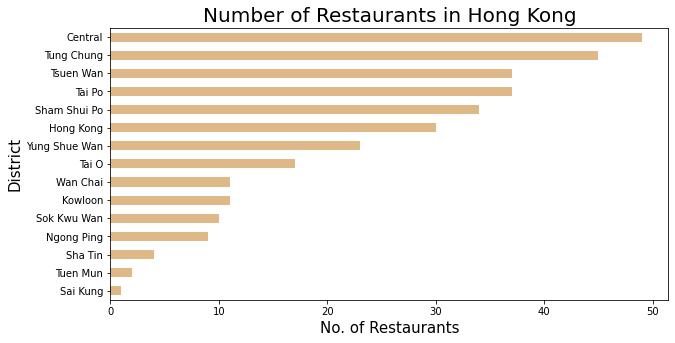

In [185]:
restaurants.groupby('District')['ID'].count().sort_values().plot.barh(figsize=(10,5), color='burlywood')
plt.title('Number of Restaurants in Hong Kong', fontsize = 20)
plt.xlabel('No. of Restaurants', fontsize=15)
plt.ylabel('District', fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [196]:
restaurants.groupby('District')['ID'].count()

District
Central          49
Hong Kong        30
Kowloon          11
Ngong Ping        9
Sai Kung          1
Sha Tin           4
Sham Shui Po     34
Sok Kwu Wan      10
Tai O            17
Tai Po           37
Tsuen Wan        37
Tuen Mun          2
Tung Chung       45
Wan Chai         11
Yung Shue Wan    23
Name: ID, dtype: int64

In [198]:
print("Central has the largest number of restaurants :",restaurants.groupby('District')['ID'].count()[0])

Central has the largest number of restaurants : 49


### 3. How many type of food in Hong Kong?

In [240]:
restaurants.groupby('Category')['ID'].count().sort_values(ascending=False)

Category
Chinese Restaurant       37
Japanese Restaurant      23
Cha Chaan Teng           17
Seafood Restaurant       16
Hong Kong Restaurant     16
                         ..
Halal Restaurant          1
Gastropub                 1
Fujian Restaurant         1
Fried Chicken Joint       1
Indonesian Restaurant     1
Name: ID, Length: 61, dtype: int64

In [243]:
print("From the Foursquare website, there are a total",len(restaurants.groupby('Category')['ID']),"types of restaurants in Hong Kong.")

From the Foursquare website, there are a total 61 types of restaurants in Hong Kong.


### 4. What is most popular food type?

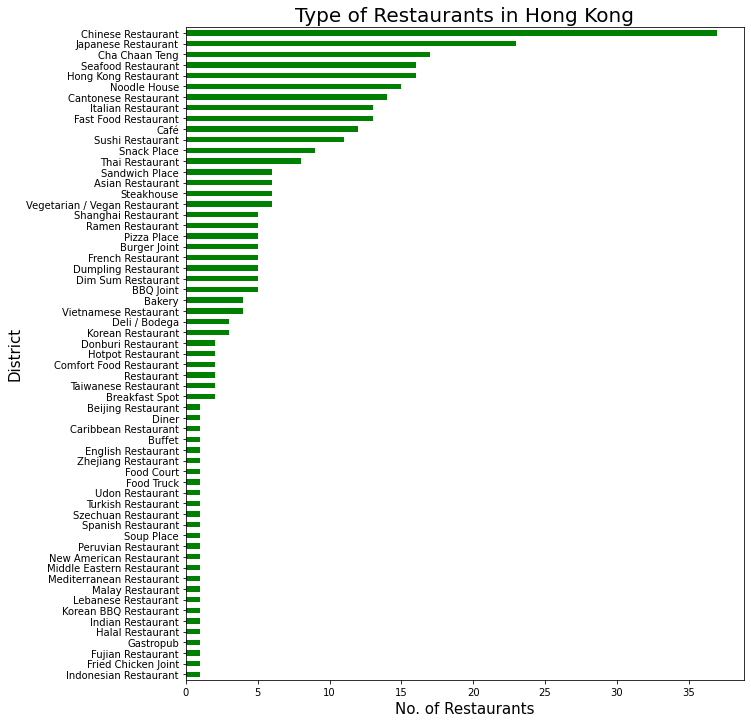

In [214]:
restaurants.groupby('Category')['ID'].count().sort_values().plot.barh(figsize=(10,12), color='green')
plt.title('Type of Restaurants in Hong Kong', fontsize = 20)
plt.xlabel('No. of Restaurants', fontsize=15)
plt.ylabel('District', fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [219]:
restaurants.groupby('Category')['ID'].count().sort_values(ascending=False)

Category
Chinese Restaurant       37
Japanese Restaurant      23
Cha Chaan Teng           17
Seafood Restaurant       16
Hong Kong Restaurant     16
                         ..
Halal Restaurant          1
Gastropub                 1
Fujian Restaurant         1
Fried Chicken Joint       1
Indonesian Restaurant     1
Name: ID, Length: 61, dtype: int64

In [225]:
print("The most popular food type is Chinese Restaurant, with",restaurants.groupby('District')['ID'].count()[0],"restaurants in Hong Kong.")

The most popular food type is Chinese Restaurant, with 49 restaurants in Hong Kong.


### 5. What is the most popular restaurant in Hong Kong?

#### By Likes

In [232]:
restaurantDetails.sort_values(by='Likes', ascending=False, axis=0)

,District,ID,Name,Category,Likes,Rating,Tips
237,Ngong Ping,5305caeb498e391fd4b9caf0,Mott 32 (卅二公館),Dim Sum Restaurant,433,9.0,135
253,Sok Kwu Wan,4ed70871be7b3567163a9b79,Yat Lok Restaurant (一樂燒鵝),Cantonese Restaurant,368,8.0,160
233,Yung Shue Wan,4b0e380af964a520115623e3,Zuma,Japanese Restaurant,335,8.7,141
3,Hong Kong,4b794ce0f964a520e9f22ee3,Wooloomooloo Steakhouse,Steakhouse,231,8.1,97
1,Hong Kong,53b508c1498ee296db480fea,Kam's Roast Goose (甘牌燒鵝),Cantonese Restaurant,229,8.2,77
...,...,...,...,...,...,...,...
138,Tung Chung,4ce7f263678aa0936f76e5ea,Yuen Kee (苑記粉麵茶餐廳),Hong Kong Restaurant,0,5.8,1
74,Hong Kong,4d97344d9079b1f7fb6b0c0a,都好燒臘粉麵茶餐廳,Cha Chaan Teng,0,5.7,1
107,Tsuen Wan,54955896498ee220d8ff34b6,Italian Tomato,Bakery,0,5.5,5
145,Tung Chung,5bfa59872be425002c4c5bab,三不館車仔麵,Noodle House,0,5.8,1


By Likes, Mott 32 (卅二公館) has the most likes which has 433 likes.<br>
The second one is Yat Lok Restaurant (一樂燒鵝) which has 368 likes.<br>
For Zuma, it is the third one, which has 335 likes.

#### By Rating

In [233]:
restaurantDetails.sort_values(by='Rating', ascending=False, axis=0)

,District,ID,Name,Category,Likes,Rating,Tips
226,Yung Shue Wan,4c7fa26501df37045bb4e6ac,Mandarin Grill + Bar (文華扒房＋酒吧),Steakhouse,55,9.2,15
237,Ngong Ping,5305caeb498e391fd4b9caf0,Mott 32 (卅二公館),Dim Sum Restaurant,433,9.0,135
227,Yung Shue Wan,4b0588d8f964a520dbdc22e3,Man Wah (文華廳),Cantonese Restaurant,38,8.8,16
275,Central,4b0588d8f964a520d5dc22e3,One Harbour Road (港灣壹號),Chinese Restaurant,40,8.7,17
4,Hong Kong,4b13d798f964a520a49923e3,Sang Kee Seafood Restaurant (生記海鮮飯店),Seafood Restaurant,76,8.7,28
...,...,...,...,...,...,...,...
124,Tsuen Wan,518e2077498eb3a9a3ae0942,Local Farmer,Café,0,5.1,8
125,Tung Chung,5d4e92d394da0b0007bb6330,Holibay Brunch,Café,0,5.1,8
126,Tung Chung,5b6e86dd7564f7003987c952,Bricklane Deli,Breakfast Spot,2,5.1,8
127,Tung Chung,4e08719cb61c60b0454b1b96,雲味園小鍋米線,Noodle House,1,5.1,8


By Rating, Mandarin Grill + Bar (文華扒房＋酒吧) has the highest rating which has a 9.2 rating.<br>
The second one is Mott 32 (卅二公館) which the rating is 9.0.<br>
For Man Wah (文華廳), it is the third one, which is 8.8 rating.

#### By Tips

In [235]:
restaurantDetails.sort_values(by='Tips', ascending=False, axis=0)

,District,ID,Name,Category,Likes,Rating,Tips
253,Sok Kwu Wan,4ed70871be7b3567163a9b79,Yat Lok Restaurant (一樂燒鵝),Cantonese Restaurant,368,8.0,160
233,Yung Shue Wan,4b0e380af964a520115623e3,Zuma,Japanese Restaurant,335,8.7,141
237,Ngong Ping,5305caeb498e391fd4b9caf0,Mott 32 (卅二公館),Dim Sum Restaurant,433,9.0,135
3,Hong Kong,4b794ce0f964a520e9f22ee3,Wooloomooloo Steakhouse,Steakhouse,231,8.1,97
235,Yung Shue Wan,4b1947f3f964a5206dda23e3,L'Atelier de Joël Robuchon,French Restaurant,105,7.9,95
...,...,...,...,...,...,...,...
35,Kowloon,4d3d5e943ec9a35ddd8b5081,Pizza Hut (必勝客),Pizza Place,0,5.9,0
34,Kowloon,4f1278dee4b0044a24589bfa,Yoshinoya (吉野家),Donburi Restaurant,3,5.9,0
30,Kowloon,4bee93863686c9b6e7a3246e,McDonald's (麥當勞),Fast Food Restaurant,1,5.9,0
31,Kowloon,4c43080bce54e21e59750d1a,Banyan Seafood Restaurant (新榕記海鮮酒家),Chinese Restaurant,0,5.9,0


By Tips, Yat Lok Restaurant (一樂燒鵝) has the largest number of tips which has 160 tips.<br>
The second one is Zuma which has 141 tips.<br>
For Mott 32 (卅二公館), it is the third one, which has 135 tips.

To conclude, even though different rankings have different results, Mott 32 (卅二公館) which is a Dim Sum Restaurant, shows the best result among all 3 rankings that has 433 likes, 135 tips with 9.0 rating.
Apart from Mott 32 (卅二公館), Zuma, which is a Japanese Restaurant, and Yat Lok Restaurant (一樂燒鵝), which is a Cantonese Restaurant, both have a great result in the ranking that Zuma has 335 likes, 141 tips with 8.7 rating while Yat Lok Restaurant (一樂燒鵝) has 368 likes, 160 tips with 8.0 rating.

## Results and Discussion <a name="results"></a>

### 6. Where should we open the restaurant?

According to the number of restaurants among all the districts in Hong Kong. Central has the largest number of restaurants. It will be a great choice of opening a restaurant there.<br><br>
Also, there are many companies in Central. Everyday many people go to Central and work, then have lunch and dinner nearby. The huge flow of people can ensure that there are enough potential customers for a new restaurant. As a result, Central will be a good place.


### 7. Which food should we provide?

As mentioned before, the most popular food type is Chinese food. There are 49 Chinese restaurants in Hong Kong. Also, for popular restaurants which are Dim Sum Restaurant, Japanese Restaurant and Cantonese Restaurant. For Dim Sum Restaurant and Cantonese Restaurant, both actually are a king of Chinese food. Therefore, Chinese food would be a good choice to open a restaurant.

## Limitation

### 1. Not enough data
From the data collected from Foursquare, there are only 320 restaurants in Hong Kong. However, Hong Kong has many more restaurants that even for a district, it can have more than several hundreds of restaurants. Moreover, too little data volume may also cause a problem that it cannot reflect the actual favourite of people. As Hong Kong people seldom use Foursquare and there is only a little data, the data volume may not be large enough to reflect the result. To improve the result, we can try to get the data from OpenRice, which is a famous website in Hong Kong which includes most of the restaurants in Hong Kong with different ratings and comments. It may have a more detailed result for analysis.

### 2. Other factors may also affect the decision
In our problem, we only need to consider the location and food type for opening a restaurant. However, there are many factors that can affect the decision. For example, we may need to consider the price of the food, the quality, average income of customer, competitors, rent, etc. These all factors may affect the revenue of a restaurant and the answer can be totally different from the original one.

## Conclusion <a name="conclusion"></a>

To conclude, according to the result found and analysis made, Central will be a good place for opening a new restaurant with Chinese food.
